## Library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from tabulate import tabulate

warnings.filterwarnings("ignore")

### Read DataSet

In [2]:
df = pd.read_excel("../DataSet/Porsline.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           100 non-null    object 
 1   Field of Study               100 non-null    object 
 2   personal interest            54 non-null     object 
 3   Family advice                16 non-null     object 
 4   Consultant's recommendation  13 non-null     object 
 5   Future work and income       49 non-null     object 
 6   Social position              23 non-null     object 
 7   University brand             13 non-null     object 
 8   Near the university          28 non-null     object 
 9   Possibilities                2 non-null      object 
 10  gain experience              22 non-null     object 
 11  interest                     99 non-null     float64
 12  Continuing education         100 non-null    int64  
 13  Change field         

,ID,Field of Study,personal interest,Family advice,Consultant's recommendation,Future work and income,Social position,University brand,Near the university,Possibilities,...,Change field,refuse,State1,State2,sex,Employment status,family income,Location,Start,end
0,X5eF,فنی و مهندسی,علاقه شخصی,توصیه خانواده,NaN,آینده کاری و درآمدی,موقعیت اجتماعی,NaN,NaN,NaN,...,1,2.0,خراسان رضوی,خراسان رضوی,خانم,شاغل (تمام وقت),بین 5 تا 10 میلیون تومان,شهر (مرکز استان),1402/01/15-23:18:35,1402/01/15-23:20:08
1,k1lD,سایر رشته های علوم پزشکی (غیر پزشکی),علاقه شخصی,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,خراسان جنوبی,خراسان رضوی,خانم,غیرشاغل,کمتر از 5 میلیون تومان,شهر (غیر از مرکز استان),1402/01/15-23:09:40,1402/01/15-23:11:06
2,FCTU,فنی و مهندسی,علاقه شخصی,NaN,NaN,NaN,NaN,NaN,نزدیک بودن دانشگاه به محل زندگی,NaN,...,1,1.0,خراسان رضوی,خراسان رضوی,آقا,شاغل (نیمه وقت),بین 5 تا 10 میلیون تومان,شهر (غیر از مرکز استان),1402/01/15-22:20:31,1402/01/15-22:23:04
3,5TmF,فنی و مهندسی,علاقه شخصی,NaN,NaN,آینده کاری و درآمدی,NaN,NaN,NaN,NaN,...,1,5.0,خراسان رضوی,خراسان رضوی,آقا,شاغل (تمام وقت),کمتر از 5 میلیون تومان,روستا,1402/01/15-22:01:50,1402/01/15-22:03:31
4,Bpz0,کشاورزی,NaN,NaN,NaN,NaN,NaN,برند دانشگاه از نظر علمی,NaN,NaN,...,4,1.0,خراسان رضوی,خراسان رضوی,خانم,شاغل (نیمه وقت),کمتر از 5 میلیون تومان,شهر (غیر از مرکز استان),1402/01/15-20:21:11,1402/01/15-20:22:31


In [3]:
## replace NaN to Ziro
df = df.fillna(0)

In [4]:
df['personal interest'] = df['personal interest'].replace("علاقه شخصی", 1)
df['Family advice'] = df['Family advice'].replace("توصیه خانواده", 1)
df["Consultant's recommendation"] = df["Consultant's recommendation"].replace("توصیه مشاور", 1)
df['Future work and income'] = df['Future work and income'].replace("آینده کاری و درآمدی", 1)
df['Social position'] = df['Social position'].replace("موقعیت اجتماعی", 1)
df['University brand'] = df['University brand'].replace("برند دانشگاه از نظر علمی", 1)
df['Near the university'] = df['Near the university'].replace("نزدیک بودن دانشگاه به محل زندگی", 1)
df['Possibilities'] = df['Possibilities'].replace("امکانات رفاهی دانشگاه (خوابگاه و ...)", 1)
df['gain experience'] = df['gain experience'].replace("کسب تجربه یک روند جدید در زندگی", 1)
df['sex']=df['sex'].replace("خانم","female")
df['sex']=df['sex'].replace("آقا","male")

In [5]:
df.describe()

,personal interest,Family advice,Consultant's recommendation,Future work and income,Social position,University brand,Near the university,Possibilities,gain experience,interest,Continuing education,Change field,refuse
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.540000,0.160000,0.130000,0.490000,0.230000,0.130000,0.280000,0.020000,0.220000,3.650000,3.31000,2.210000,2.050000
std,0.500908,0.368453,0.337998,0.502418,0.422953,0.337998,0.451261,0.140705,0.416333,1.416889,1.46125,1.512874,1.431076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.00000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.00000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.00000,3.250000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.00000,5.000000,5.000000


In [6]:

DataFrame = df[['sex','personal interest','Family advice',"Consultant's recommendation",'Future work and income','Social position','University brand',
         'Near the university','Possibilities','gain experience']]

## datafram_columns just use for plot
datafram_columns = df[['Field of Study','personal interest','Family advice',"Consultant's recommendation",'Future work and income','Social position','University brand',
         'Near the university','Possibilities','gain experience','interest', 'Continuing education','Change field', 'refuse', 'State1', 'State2','Employment status', 'family income', 'Location']]

### Female DataFrame 

In [7]:
df_female = DataFrame[DataFrame['sex'] == 'female'].reset_index()
df_female = df_female.drop('index',axis=1)
display(df_female.describe())
df_female = df_female.drop('sex',axis=1)

,personal interest,Family advice,Consultant's recommendation,Future work and income,Social position,University brand,Near the university,Possibilities,gain experience
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.413043,0.130435,0.130435,0.543478,0.239130,0.173913,0.239130,0.043478,0.217391
std,0.497821,0.340503,0.340503,0.503610,0.431266,0.383223,0.431266,0.206185,0.417029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Male DataFrame

In [8]:
df_male = DataFrame[DataFrame['sex'] == 'male'].reset_index()
df_male = df_male.drop('index',axis=1)
display(df_male.describe())
df_male = df_male.drop('sex',axis=1)

,personal interest,Family advice,Consultant's recommendation,Future work and income,Social position,University brand,Near the university,Possibilities,gain experience
count,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,0.648148,0.185185,0.12963,0.444444,0.222222,0.092593,0.314815,0.0,0.222222
std,0.482032,0.392095,0.33905,0.501570,0.419643,0.292582,0.468803,0.0,0.419643
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [9]:
arr = []
N_male = df_male.shape[0]
N_female = df_female.shape[0]

## Create 2D Array

for i,j in enumerate(df_male.columns):
    _Nmale = df_male[j].sum()
    male = _Nmale/N_male
    _Nfemale = df_female[j].sum()
    female = _Nfemale/N_female
    arr.append([])
    arr[i].append(j)
    arr[i].append(_Nmale)
    arr[i].append( male / ( female + male ) )
    arr[i].append(_Nfemale)
    arr[i].append( female/ ( female + male ) )
    
## arr = [[j, df_male[j].sum()/N_male, df_female[j].sum()/N_female] for i,j in enumerate(df_male.columns)]
arr

[['personal interest', 35, 0.6107738998482549, 19, 0.389226100151745],
 ['Family advice', 10, 0.5867346938775511, 6, 0.41326530612244905],
 ["Consultant's recommendation", 7, 0.4984520123839009, 6, 0.5015479876160991],
 ['Future work and income', 24, 0.44987775061124696, 25, 0.5501222493887531],
 ['Social position', 12, 0.481675392670157, 11, 0.518324607329843],
 ['University brand', 5, 0.34743202416918434, 8, 0.6525679758308158],
 ['Near the university', 17, 0.5683139534883721, 11, 0.4316860465116279],
 ['Possibilities', 0, 0.0, 2, 1.0],
 ['gain experience', 12, 0.5054945054945055, 10, 0.4945054945054945]]

In [10]:
header = ["Model","Number of Male","Male","Number of Female","Female"]
print(tabulate(arr,header,showindex="always",tablefmt = "fancy_outline",floatfmt=".2f"))

╒════╤═════════════════════════════╤══════════════════╤════════╤════════════════════╤══════════╕
│    │ Model                       │   Number of Male │   Male │   Number of Female │   Female │
╞════╪═════════════════════════════╪══════════════════╪════════╪════════════════════╪══════════╡
│  0 │ personal interest           │            35.00 │   0.61 │              19.00 │     0.39 │
│  1 │ Family advice               │            10.00 │   0.59 │               6.00 │     0.41 │
│  2 │ Consultant's recommendation │             7.00 │   0.50 │               6.00 │     0.50 │
│  3 │ Future work and income      │            24.00 │   0.45 │              25.00 │     0.55 │
│  4 │ Social position             │            12.00 │   0.48 │              11.00 │     0.52 │
│  5 │ University brand            │             5.00 │   0.35 │               8.00 │     0.65 │
│  6 │ Near the university         │            17.00 │   0.57 │              11.00 │     0.43 │
│  7 │ Possibilities          

In [11]:
X = df.drop(['sex','Start','end','ID'], axis=1).values
y = df['sex']

## Pre-processing

In [12]:
## Label Field of study
le_FieldOfStudy = LabelEncoder()
le_FieldOfStudy.fit(["فنی و مهندسی","سایر رشته های علوم پزشکی (غیر پزشکی)","علوم انسانی","علوم پایه","کشاورزی","علوم پزشکی، دندان پزشکی و داروسازی","هنر و معماری"])
X[:,0] = le_FieldOfStudy.transform(X[:,0])

## Label State 
le_State1 = LabelEncoder()
le_State1.fit(["خراسان رضوی","خراسان جنوبی","اصفهان","مازندران","گلستان","هرمزگان","البرز","خراسان شمالی","قزوین","کرمان","فارس","ایلام","چهارمحال و بختیاری","گیلان"])
X[:,14] = le_State1.transform(X[:,14])

## Label State
le_State2 = LabelEncoder()
le_State2.fit(["خراسان رضوی","اصفهان","هرمزگان","مازندران"])
X[:,15] = le_State2.transform(X[:,15]) 

## Label Employment Status
le_EmploymentStatus = LabelEncoder()
le_EmploymentStatus.fit(["غیرشاغل","شاغل (نیمه وقت)","شاغل (تمام وقت)"])
X[:,16] = le_EmploymentStatus.transform(X[:,16])

## Label Family Incom
le_FamilyIncom = LabelEncoder()
le_FamilyIncom.fit(['0',"کمتر از 5 میلیون تومان","بین 5 تا 10 میلیون تومان","بین 10 تا 20 میلیون تومان","بیش از 20 میلیون تومان"])
X[:,17] = le_FamilyIncom.transform(X[:,17])

## Label Location
le_location = LabelEncoder()
le_location.fit(["شهر (مرکز استان)","شهر (غیر از مرکز استان)","روستا"])
X[:,18] = le_location.transform(X[:,18])

## print 5 data first
X[0:5]

array([[4, 1, 1, 0, 1, 1, 0, 0, 0, 0, 5.0, 5, 1, 2.0, 4, 1, 0, 3, 2],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4.0, 4, 1, 1.0, 3, 1, 2, 4, 1],
       [4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4.0, 3, 1, 1.0, 4, 1, 1, 3, 1],
       [4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5.0, 1, 1, 5.0, 4, 1, 0, 4, 0],
       [6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4.0, 3, 4, 1.0, 4, 1, 1, 4, 1]],
      dtype=object)

In [13]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

## Model Selection

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.2)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (80, 19)
Test Shape: (20, 19)


## Modeling 

1. More Predictiveress
2. Less Impurity
4. Lower Entropy


### Information Gain
$$
IG = \text{Entropy Befor Split}\ - \text{Weighted Entropy After Split}\
$$

In [52]:
(X_train).shape

(80, 19)

In [97]:
featureSelection = SequentialFeatureSelector(DecisionTreeClassifier(criterion='entropy',max_depth=None),k_features=5,forward=True,verbose=0,scoring='accuracy',n_jobs=-1)

In [98]:
model=featureSelection.fit(X_train, y_train)


In [99]:
display(model.k_feature_idx_)
display(model.k_score_)

(0, 4, 5, 11, 14)

0.725

In [100]:
featureselection = model.k_feature_idx_

In [101]:
X_train

array([[4, 1, 0, ..., 1, 1, 2],
       [4, 1, 0, ..., 2, 0, 1],
       [4, 1, 0, ..., 0, 4, 0],
       ...,
       [4, 0, 0, ..., 2, 0, 1],
       [4, 1, 1, ..., 1, 0, 2],
       [4, 0, 1, ..., 2, 2, 2]], dtype=object)

In [102]:
x_train = X_train[:,list(featureselection)]

In [107]:
model_l = DecisionTreeClassifier(criterion="entropy",max_depth=5).fit(x_train, y_train)

In [108]:
model_pred = model_l.predict(X_test[:,list(featureselection)])

print(model_pred[0:7])
print(y_test[0:7])

['male' 'male' 'male' 'male' 'male' 'male' 'female']
26      male
86      male
2       male
55    female
75    female
93      male
16    female
Name: sex, dtype: object


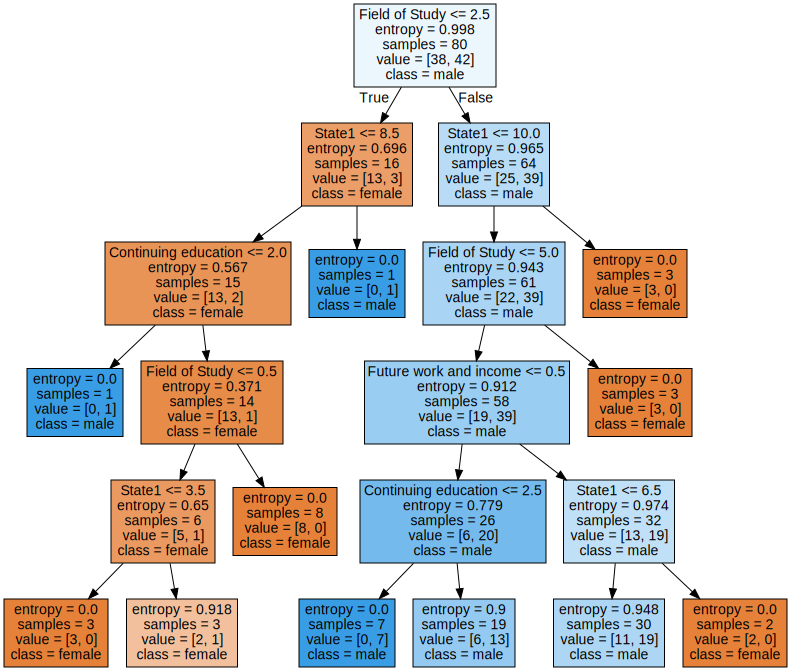

In [109]:
# DOT data
feature = datafram_columns.columns[list(featureselection)]
dot_data = export_graphviz(model_l, out_file=None, 
                                feature_names=feature,  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [105]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3).fit(X_train, y_train)

## Prediction
model_pred = model.predict(X_test)

print(model_pred[0:7])
print(y_test[0:7])

['male' 'male' 'male' 'male' 'female' 'male' 'female']
26      male
86      male
2       male
55    female
75    female
93      male
16    female
Name: sex, dtype: object


In [44]:
print(f"Test Set Accuracy: {accuracy_score(y_test,model_pred):0.3f}")

Test Set Accuracy: 0.700


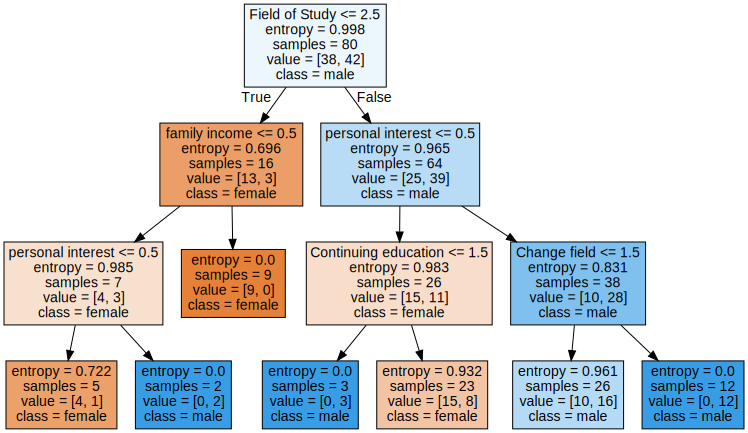

In [45]:
# DOT data
feature = datafram_columns.columns
dot_data = export_graphviz(model, out_file=None, 
                                feature_names=feature,  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

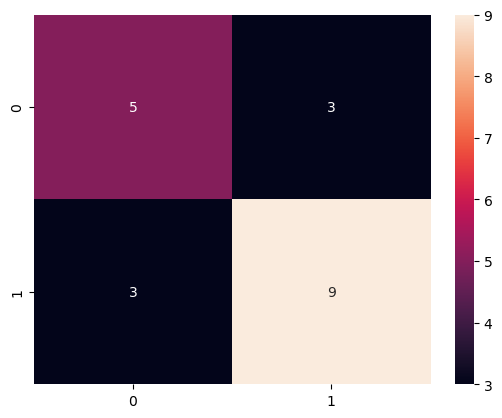

In [49]:
y_pred = model.predict(X=X_test)
conf = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(pd.DataFrame(conf),annot=True ,fmt='g')

In [51]:
accuracy = accuracy_score(y_test, model_pred)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
precision = precision_score(y_test,model_pred)
print('percision of the binary classifier = {:0.3f}'.format(precision))
recall = recall_score(y_test, model_pred)
print('recall of the binary classifier = {:0.3f}'.format(recall))
f1 = f1_score(y_test, model_pred)
print('f1 of the binary classifier = {:0.3f}'.format(f1))

Accuracy of the binary classifier = 0.700


ValueError: pos_label=1 is not a valid label. It should be one of ['female', 'male']

### Gini impurity


In [52]:
## Create Decision Tree Model
## Fit training feature and response
model = DecisionTreeClassifier(criterion='gini',max_depth=10).fit(X_train, y_train)

## Prediction
model_pred = model.predict(X_test)

print(model_pred[0:7])
print(y_test[0:7])

['male' 'female' 'male' 'male' 'male' 'male' 'female']
26      male
86      male
2       male
55    female
75    female
93      male
16    female
Name: sex, dtype: object


### Evaluation

In [53]:
print(f"Test Set Accuracy: {accuracy_score(y_test,model_pred):0.3f}")

Test Set Accuracy: 0.550


### Visualization

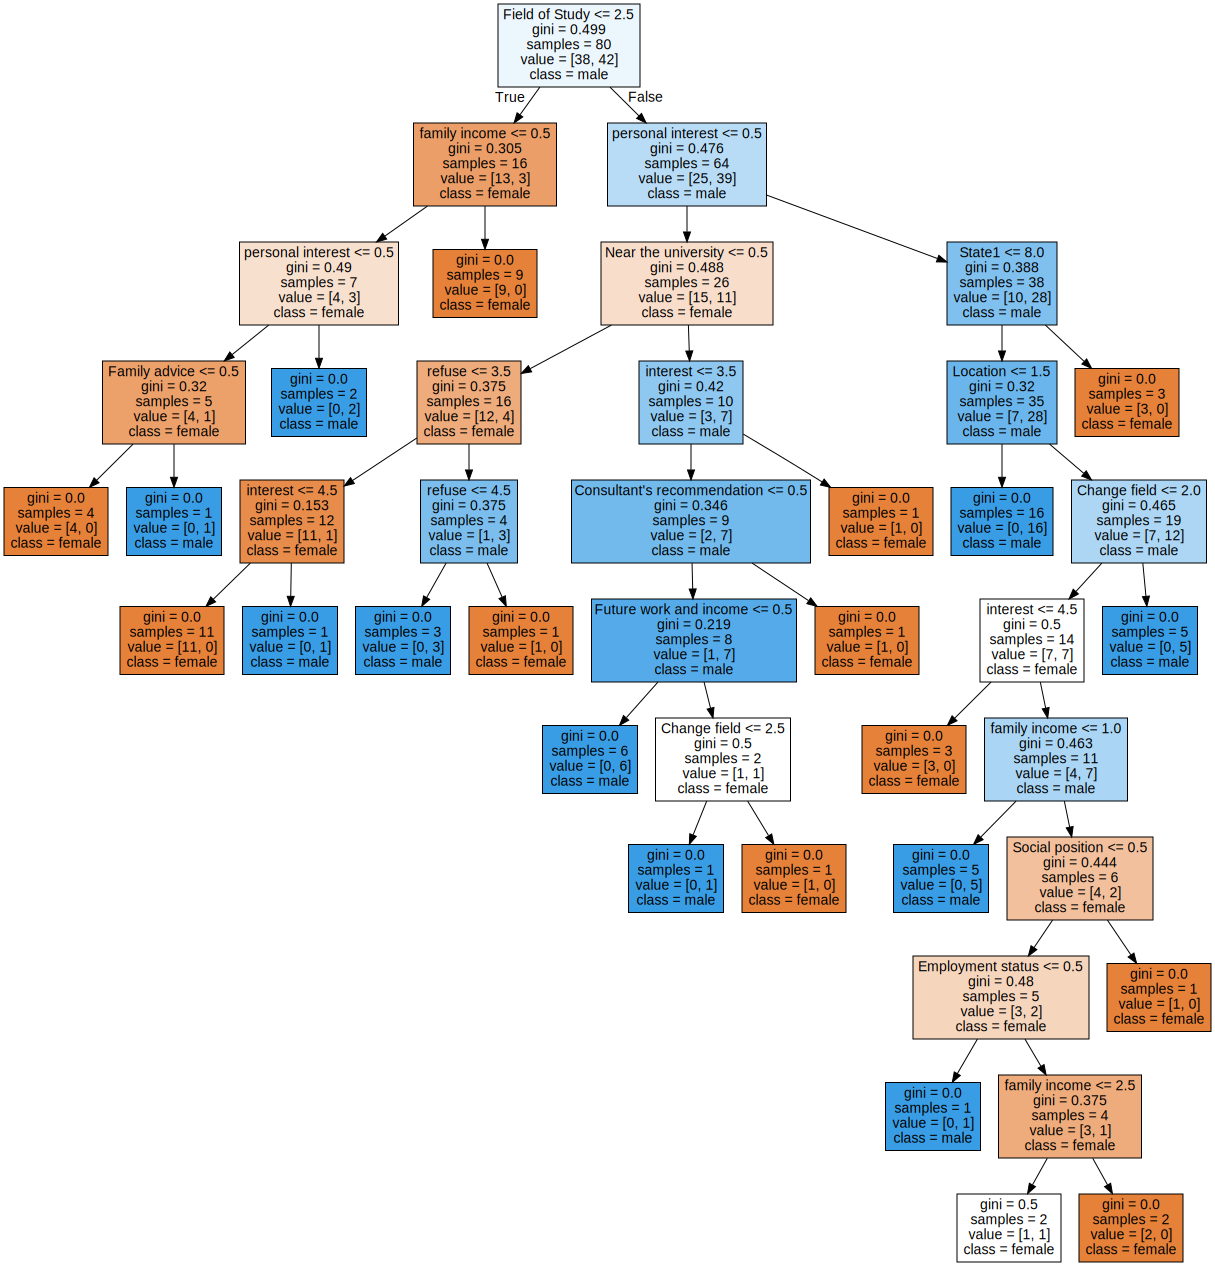

In [54]:
# DOT data
feature = datafram_columns.columns
dot_data = export_graphviz(model, out_file=None, 
                                feature_names=feature,  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Entropy

$$
E = -P(yes)log(yes)-P(no)log(no)
$$

In [55]:
## Create Decision Tree Model
## Fit training feature and response
model = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

## Prediction
model_pred = model.predict(X_test)

print(model_pred[0:7])
print(y_test[0:7])

['male' 'female' 'male' 'male' 'male' 'male' 'female']
26      male
86      male
2       male
55    female
75    female
93      male
16    female
Name: sex, dtype: object


### Evaluation

In [56]:
print(f"Test Set Accuracy: {accuracy_score(y_test,model_pred):0.3f}")

Test Set Accuracy: 0.600


### Visualization

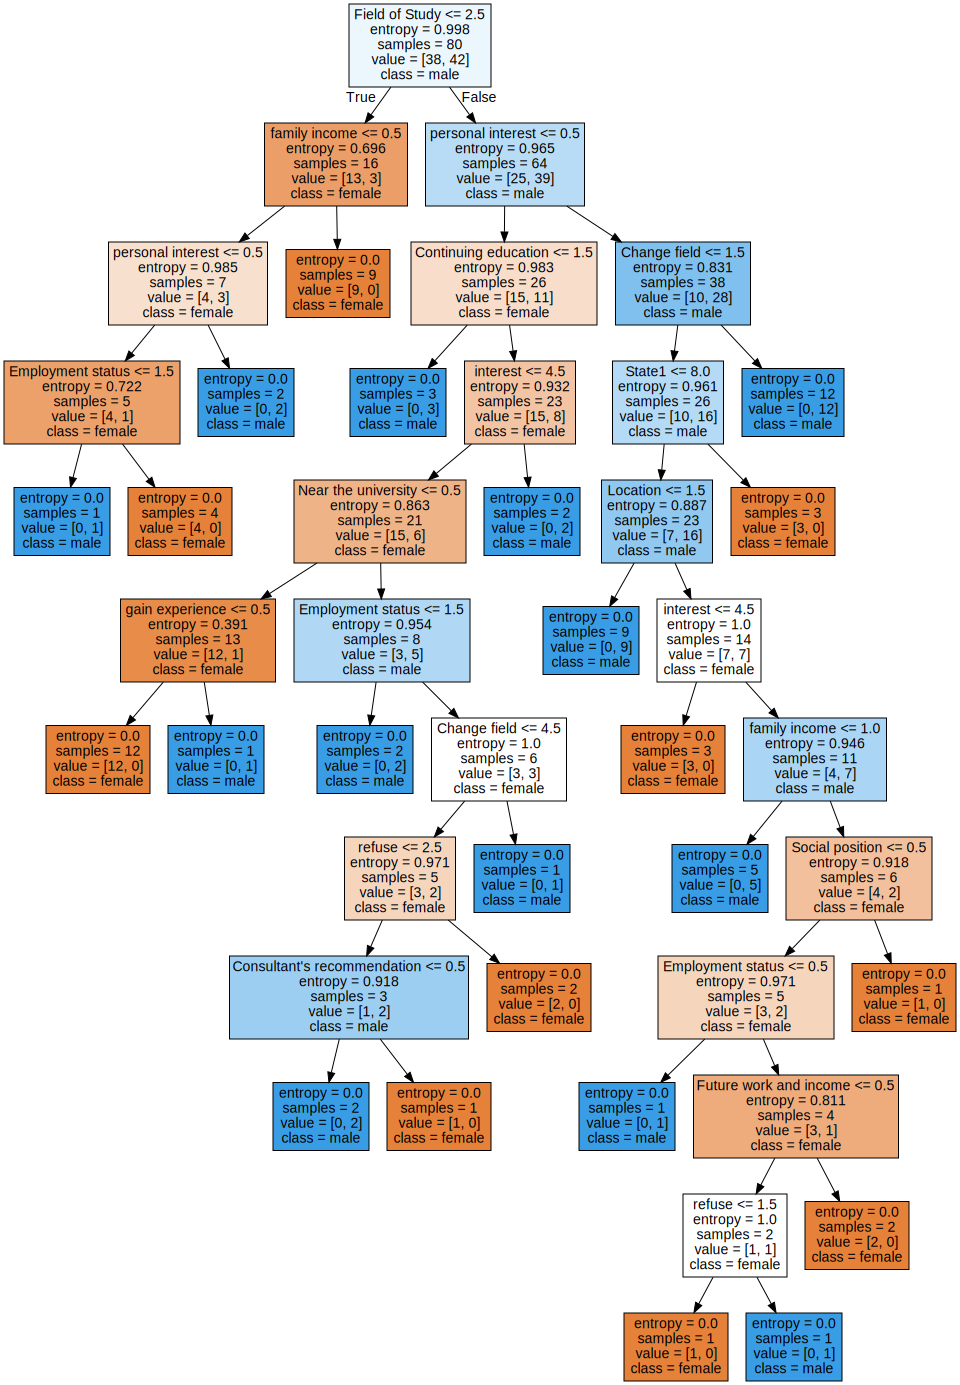

In [57]:
# DOT data
feature = datafram_columns.columns
dot_data = export_graphviz(model, out_file=None, 
                                feature_names=feature,  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Log Loss

$$
-\frac{1}{N}\sum_{i=1}^{N}y_i.log(p(y_i))+(1-y_i).log(1-p(y_i))\\
$$

In [58]:
## Create Decision Tree Model
## Fit training feature and response
model = DecisionTreeClassifier(criterion='log_loss').fit(X_train, y_train)

## Prediction
model_pred = model.predict(X_test)

print(model_pred[0:7])
print(y_test[0:7])

['male' 'female' 'male' 'male' 'male' 'male' 'female']
26      male
86      male
2       male
55    female
75    female
93      male
16    female
Name: sex, dtype: object


## Evaluation

In [59]:
print(f"Test Set Accuracy: {accuracy_score(y_test,model_pred):0.3f}")

Test Set Accuracy: 0.650


## Visualization

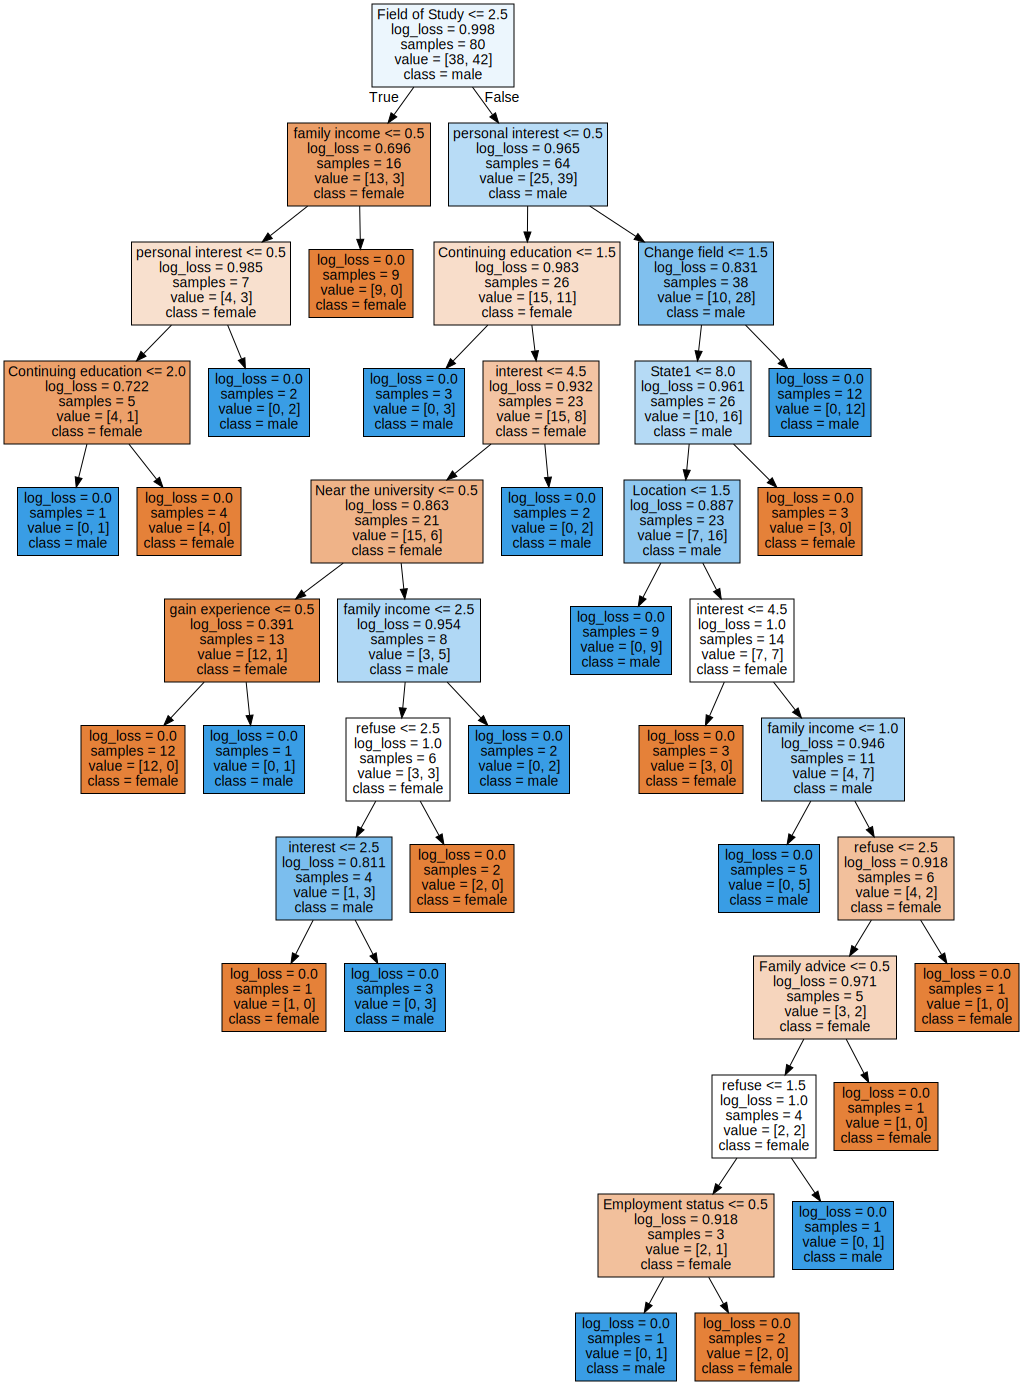

In [60]:
# DOT data
feature = datafram_columns.columns
dot_data = export_graphviz(model, out_file=None, 
                                feature_names=feature,  
                                class_names=np.unique(y_train),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph